In [65]:
import tensorflow as tf
import os
import random
import numpy as np

from skimage.io import imread, imshow
from skimage.transform import resize
import matplotlib.pyplot as plt

from datetime import datetime
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import TensorBoard

import time
import random

from textwrap import wrap

In [4]:
print(tf.__version__)

2.4.0


In [5]:
# Initialise the input image dimensions and the number of colour channels
# X-ray images are greyscale so they we require only one colour channel
IMG_WIDTH = 1024
IMG_HEIGHT = 1024
IMG_CHANNELS = 1

In [6]:
# Initialise numpy arrays for X_data and Y_data to store the input images
X_data = np.zeros((180, IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
Y_data = np.zeros((180, IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))

In [7]:
# Here the 180 images are loaded into numpy arrays with shape (180, 1024, 1024, 1)
# For each 1024 by 1024 matrix, each element in the matrix corresponds to the pixel value in the .tif image
# Load 1mm images into X_data
for i in range(10):
    img = imread(('1 mm/32p1r00' + str(i) + '.tif'), as_gray=True)[:,:]
    img = img[:,:,np.newaxis]
    X_data[i] = img
    
for i in range(10,100):
    img = imread(('1 mm/32p1r0' + str(i) + '.tif'), as_gray=True)[:,:]
    img = img[:,:,np.newaxis]
    X_data[i] = img
    
for i in range(10):
    img = imread(('1 mm/32p1r10' + str(i) + '.tif'), as_gray=True)[:,:]
    img = img[:,:,np.newaxis]
    X_data[100+i] = img
    
for i in range (10,80):
    img = imread(('1 mm/32p1r1' + str(i) + '.tif'), as_gray=True)[:,:]
    img = img[:,:,np.newaxis]
    X_data[100+i] = img
    
    
# Load 0mm data into Y_data
for i in range(10):
    img = imread(('0 mm/32p0r00' + str(i) + '.tif'), as_gray=True)[:,:]
    img = img[:,:,np.newaxis]
    Y_data[i] = img
    
for i in range(10,100):
    img = imread(('0 mm/32p0r0' + str(i) + '.tif'), as_gray=True)[:,:]
    img = img[:,:,np.newaxis]
    Y_data[i] = img
    
for i in range(10):
    img = imread(('0 mm/32p0r10' + str(i) + '.tif'), as_gray=True)[:,:]
    img = img[:,:,np.newaxis]
    Y_data[100+i] = img
    
for i in range (10,80):
    img = imread(('0 mm/32p0r1' + str(i) + '.tif'), as_gray=True)[:,:]
    img = img[:,:,np.newaxis]
    Y_data[100+i] = img

In [8]:
# Assign the first 170 images in X_data and Y_data to X_train and Y_train respectively 
# and the last 10 images to X_test and Y_test
TRAIN_NUM = 170
X_train = X_data[0:TRAIN_NUM]
X_test = X_data[TRAIN_NUM:]
Y_train = Y_data[0:TRAIN_NUM]
Y_test = Y_data[TRAIN_NUM:]

In [9]:
print(np.amax(X_train))
print(np.amin(X_train))

1.0778287649154663
0.9167473316192627


In [10]:
print(np.amax(Y_train))
print(np.amin(Y_train))

1.0
0.9252259731292725


In [11]:
# Stretch X_train and Y_train and assign to X_train_stretch and Y_train_stretch respectively
X_train_temp = np.subtract(X_train,0.9)
X_train_stretch = np.multiply(X_train_temp,10)

Y_train_temp = np.subtract(Y_train,0.9)
Y_train_stretch = np.multiply(Y_train_temp,10)

X_test_temp = np.subtract(X_test,0.9)
X_test_stretch = np.multiply(X_test_temp,10)

In [12]:
print(np.amax(X_train_stretch))
print(np.amin(X_train_stretch))

1.7782876491546629
0.16747331619262673


In [13]:
print(np.amax(Y_train_stretch))
print(np.amin(Y_train_stretch))

0.9999999999999998
0.2522597312927244


In [14]:
random.seed(a=8, version=2)

In [15]:
rand_train = random.randint(0, len(X_train)-1)

In [16]:
print(rand_train)

58


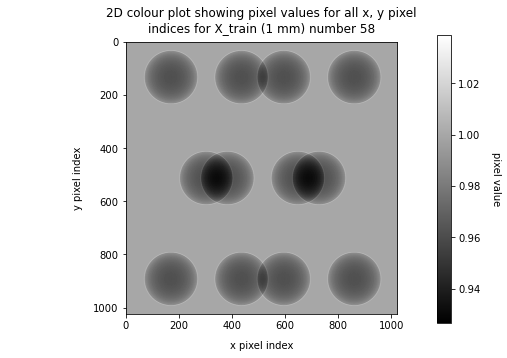

In [118]:
fig = plt.figure(figsize=(9, 5))

ax = fig.add_subplot(111)
ax.set_title("\n".join(wrap('2D colour plot showing pixel values for all x, y pixel indices for X_train (1 mm) number ' 
          + str(rand_train), 60)), pad=10)
plt.imshow(np.squeeze(X_train[rand_train]), cmap='gray')
plt.xlabel('x pixel index', labelpad=10)
plt.ylabel('y pixel index', labelpad=10)
ax.set_aspect('equal')

cax = fig.add_axes([0.12, 0.1, 0.78, 0.8])
cax.get_xaxis().set_visible(False)
cax.get_yaxis().set_visible(False)
cax.patch.set_alpha(0)
cax.set_frame_on(False)
cbar = plt.colorbar(orientation='vertical')
cbar.set_label('pixel value', rotation=270, labelpad=20)
plt.savefig('x_train.png', bbox_inches='tight')
plt.show()

In [127]:
### old figure
"""imshow(np.squeeze(X_train[rand_train]), cmap='gray')
plt.title('2D colour map showing pixel values for all x, y pixel indices for X_train (1 mm) number ' 
          + str(rand_train), pad=20)
plt.title("\n".join(wrap("Some really really long long long title I really really need - and just can't - just can't - make it any - simply any - shorter - at all.", 60)))
plt.xlabel('x pixel index', labelpad=30)
plt.ylabel('y pixel index', labelpad=20)
plt.subplots_adjust(left=4, right=5)
plt.savefig('x_train.png', bbox_inches='tight')
plt.show()"""

'imshow(np.squeeze(X_train[rand_train]), cmap=\'gray\')\nplt.title(\'2D colour map showing pixel values for all x, y pixel indices for X_train (1 mm) number \' \n          + str(rand_train), pad=20)\nplt.title("\n".join(wrap("Some really really long long long title I really really need - and just can\'t - just can\'t - make it any - simply any - shorter - at all.", 60)))\nplt.xlabel(\'x pixel index\', labelpad=30)\nplt.ylabel(\'y pixel index\', labelpad=20)\nplt.subplots_adjust(left=4, right=5)\nplt.savefig(\'x_train.png\', bbox_inches=\'tight\')\nplt.show()'

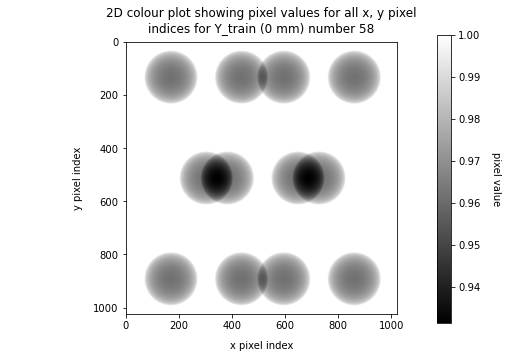

In [122]:
fig = plt.figure(figsize=(9, 5))

ax = fig.add_subplot(111)
ax.set_title("\n".join(wrap('2D colour plot showing pixel values for all x, y pixel indices for Y_train (0 mm) number ' 
          + str(rand_train), 60)), pad=10)
plt.imshow(np.squeeze(Y_train[rand_train]), cmap='gray')
plt.xlabel('x pixel index', labelpad=10)
plt.ylabel('y pixel index', labelpad=10)
ax.set_aspect('equal')

cax = fig.add_axes([0.12, 0.1, 0.78, 0.8])
cax.get_xaxis().set_visible(False)
cax.get_yaxis().set_visible(False)
cax.patch.set_alpha(0)
cax.set_frame_on(False)
cbar = plt.colorbar(orientation='vertical')
cbar.set_label('pixel value', rotation=270, labelpad=20)
plt.savefig('y_train.png', bbox_inches='tight')
plt.show()

In [123]:
### old figure
"""imshow(np.squeeze(Y_train[rand_train]), cmap='gray')
plt.title('2D colour plot showing pixel values for all x, y pixel indices for Y_train (0 mm) number ' 
          + str(rand_train), pad=20)
plt.xlabel('x pixel index', labelpad=30)
plt.ylabel('y pixel index', labelpad=20)
plt.show"""

"imshow(np.squeeze(Y_train[rand_train]), cmap='gray')\nplt.title('2D colour plot showing pixel values for all x, y pixel indices for Y_train (0 mm) number ' \n          + str(rand_train), pad=20)\nplt.xlabel('x pixel index', labelpad=30)\nplt.ylabel('y pixel index', labelpad=20)\nplt.show"

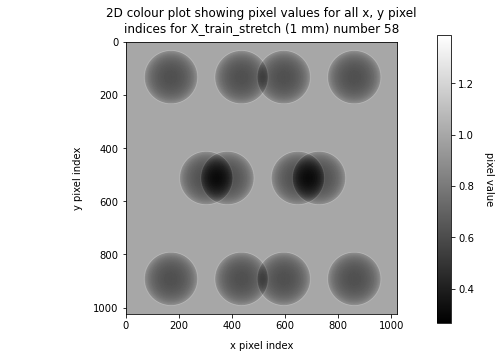

In [126]:
fig = plt.figure(figsize=(9, 5))

ax = fig.add_subplot(111)
ax.set_title("\n".join(wrap('2D colour plot showing pixel values for all x, y pixel indices for X_train_stretch (1 mm) number ' 
          + str(rand_train), 60)), pad=10)
plt.imshow(np.squeeze(X_train_stretch[rand_train]), cmap='gray')
plt.xlabel('x pixel index', labelpad=10)
plt.ylabel('y pixel index', labelpad=10)
ax.set_aspect('equal')

cax = fig.add_axes([0.12, 0.1, 0.78, 0.8])
cax.get_xaxis().set_visible(False)
cax.get_yaxis().set_visible(False)
cax.patch.set_alpha(0)
cax.set_frame_on(False)
cbar = plt.colorbar(orientation='vertical')
cbar.set_label('pixel value', rotation=270, labelpad=20)
plt.savefig('x_train_stretch.png', bbox_inches='tight')
plt.show()

In [125]:
### old figure
"""imshow(np.squeeze(X_train_stretch[rand_train]), cmap='gray')
plt.title('2D colour map showing pixel values for all x, y pixel indices for X_train_stretch (1 mm) number ' 
          + str(rand_train), pad=20)
plt.xlabel('x pixel index', labelpad=30)
plt.ylabel('y pixel index', labelpad=20)
plt.show"""

"imshow(np.squeeze(X_train_stretch[rand_train]), cmap='gray')\nplt.title('2D colour map showing pixel values for all x, y pixel indices for X_train_stretch (1 mm) number ' \n          + str(rand_train), pad=20)\nplt.xlabel('x pixel index', labelpad=30)\nplt.ylabel('y pixel index', labelpad=20)\nplt.show"

In [19]:
rand_test = random.randint(0, len(X_test)-1)

In [20]:
print(rand_test)

5


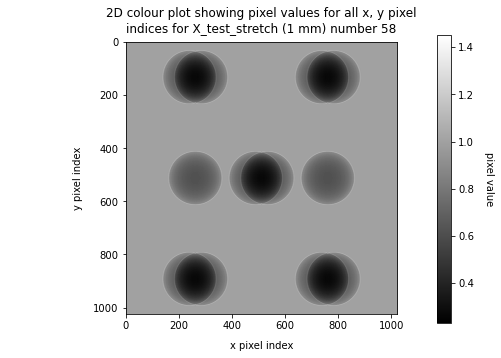

In [145]:
fig = plt.figure(figsize=(9, 5))

ax = fig.add_subplot(111)
ax.set_title("\n".join(wrap('2D colour plot showing pixel values for all x, y pixel indices for X_test_stretch (1 mm) number ' 
          + str(rand_train), 60)), pad=10)
plt.imshow(np.squeeze(X_test_stretch[rand_test]), cmap='gray')
plt.xlabel('x pixel index', labelpad=10)
plt.ylabel('y pixel index', labelpad=10)
ax.set_aspect('equal')

cax = fig.add_axes([0.12, 0.1, 0.78, 0.8])
cax.get_xaxis().set_visible(False)
cax.get_yaxis().set_visible(False)
cax.patch.set_alpha(0)
cax.set_frame_on(False)
cbar = plt.colorbar(orientation='vertical')
cbar.set_label('pixel value', rotation=270, labelpad=20)
plt.savefig('x_test_stretch.png', bbox_inches='tight')
plt.show()

In [129]:
### old figure
"""imshow(np.squeeze(X_test_stretch[rand_test]), cmap='gray')
plt.title('2D colour map showing pixel values for all x, y pixel indices for X_test_stretch (1 mm) number ' 
          + str(rand_train), pad=20)
plt.xlabel('x pixel index', labelpad=30)
plt.ylabel('y pixel index', labelpad=20)
plt.show"""

"imshow(np.squeeze(X_test_stretch[rand_test]), cmap='gray')\nplt.title('2D colour map showing pixel values for all x, y pixel indices for X_test_stretch (1 mm) number ' \n          + str(rand_train), pad=20)\nplt.xlabel('x pixel index', labelpad=30)\nplt.ylabel('y pixel index', labelpad=20)\nplt.show"

In [19]:
#Build the model
inputs = tf.keras.layers.Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))

#Contraction path
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(inputs)
c1 = tf.keras.layers.Dropout(0.1)(c1)
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)

c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
c2 = tf.keras.layers.Dropout(0.1)(c2)
c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)

c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
c3 = tf.keras.layers.Dropout(0.2)(c3)
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)

#Expansive path
u4 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c3)
u4 = tf.keras.layers.concatenate([u4, c2])
c4 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u4)
c4 = tf.keras.layers.Dropout(0.1)(c4)
c4 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)

u5 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c4)
u5 = tf.keras.layers.concatenate([u5, c1], axis=3)
c5 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u5)
c5 = tf.keras.layers.Dropout(0.1)(c5)
c5 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)

outputs = tf.keras.layers.Conv2D(1, (1, 1), activation='relu')(c5)

model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
model.compile(
    optimizer='sgd',
    loss='mse',
    metrics=[tf.keras.metrics.RootMeanSquaredError()])
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 1024, 1024,  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 1024, 1024, 1 160         input_1[0][0]                    
__________________________________________________________________________________________________
dropout (Dropout)               (None, 1024, 1024, 1 0           conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 1024, 1024, 1 2320        dropout[0][0]                    
______________________________________________________________________________________________

In [20]:
NAME = "narrow-unet{}".format(int(time.time()))

In [21]:
tensorboard = TensorBoard(log_dir="logs/{}".format(NAME))

In [22]:
#Callbacks
callbacks = [
        tf.keras.callbacks.EarlyStopping(patience=5, monitor='val_loss'),
        tensorboard]

In [23]:
tf.test.is_gpu_available(
    cuda_only=False, min_cuda_compute_capability=None
)

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [24]:
with tf.device("/device:GPU:0"):
    results = model.fit(X_train_stretch, Y_train_stretch, validation_split=0.1, batch_size=1, epochs=25, callbacks=callbacks)
model.save(os.path.join("models", NAME))

Epoch 1/25
153/153 [==============================] - 84s 83ms/step - loss: 0.4167 - root_mean_squared_error: 0.6202 - val_loss: 0.0164 - val_root_mean_squared_error: 0.1279
Epoch 2/25
153/153 [==============================] - 12s 78ms/step - loss: 0.0170 - root_mean_squared_error: 0.1302 - val_loss: 0.0132 - val_root_mean_squared_error: 0.1148
Epoch 3/25
153/153 [==============================] - 12s 79ms/step - loss: 0.0120 - root_mean_squared_error: 0.1093 - val_loss: 0.0132 - val_root_mean_squared_error: 0.1150
Epoch 4/25
153/153 [==============================] - 12s 79ms/step - loss: 0.0096 - root_mean_squared_error: 0.0981 - val_loss: 0.0119 - val_root_mean_squared_error: 0.1089
Epoch 5/25
153/153 [==============================] - 12s 79ms/step - loss: 0.0082 - root_mean_squared_error: 0.0907 - val_loss: 0.0111 - val_root_mean_squared_error: 0.1055
Epoch 6/25
153/153 [==============================] - 11s 75ms/step - loss: 0.0073 - root_mean_squared_error: 0.0854 - val_loss: 0

In [2]:
model = tf.keras.models.load_model('models/narrow-unet1612691914')

In [17]:
X_predict_stretch = model.predict(
    X_test_stretch, batch_size=None, verbose=1, steps=None, max_queue_size=10,
    workers=1, use_multiprocessing=False
)

1/1 [==============================] - 6s 6s/step


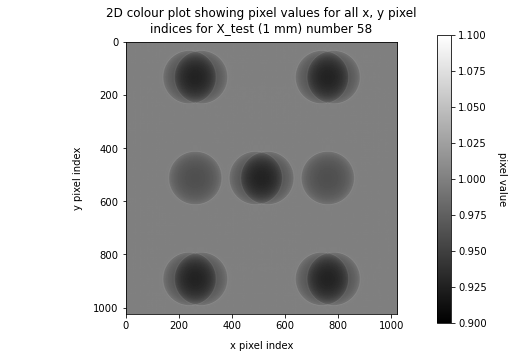

In [143]:
fig = plt.figure(figsize=(9, 5))

ax = fig.add_subplot(111)
ax.set_title("\n".join(wrap('2D colour plot showing pixel values for all x, y pixel indices for X_test (1 mm) number ' 
          + str(rand_train), 60)), pad=10)
plt.imshow(np.squeeze(X_test[rand_test]), cmap='gray', vmin=0.9, vmax=1.1)
plt.xlabel('x pixel index', labelpad=10)
plt.ylabel('y pixel index', labelpad=10)
ax.set_aspect('equal')

cax = fig.add_axes([0.12, 0.1, 0.78, 0.8])
cax.get_xaxis().set_visible(False)
cax.get_yaxis().set_visible(False)
cax.patch.set_alpha(0)
cax.set_frame_on(False)
cbar = plt.colorbar(orientation='vertical')
cbar.set_label('pixel value', rotation=270, labelpad=20)
plt.savefig('x_test.png', bbox_inches='tight')
plt.show()

In [131]:
### old figure
"""imshow(np.squeeze(X_test[rand_test]), cmap='gray', vmin = 0.9, vmax=1.1)
plt.title('2D colour map showing pixel values for all x, y pixel indices for X_test (1 mm) number ' 
          + str(rand_test), pad=20)
plt.xlabel('x pixel index', labelpad=30)
plt.ylabel('y pixel index', labelpad=20)
plt.tight_layout()
plt.show"""

"imshow(np.squeeze(X_test[rand_test]), cmap='gray', vmin = 0.9, vmax=1.1)\nplt.title('2D colour map showing pixel values for all x, y pixel indices for X_test (1 mm) number ' \n          + str(rand_test), pad=20)\nplt.xlabel('x pixel index', labelpad=30)\nplt.ylabel('y pixel index', labelpad=20)\nplt.tight_layout()\nplt.show"

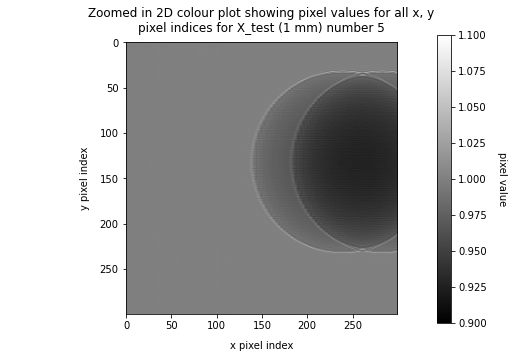

In [156]:
fig = plt.figure(figsize=(9, 5))

ax = fig.add_subplot(111)
ax.set_title("\n".join(wrap('Zoomed in 2D colour plot showing pixel values for all x, y pixel indices for X_test (1 mm) number ' 
          + str(rand_test), 60)), pad=10)
plt.imshow(np.squeeze(X_test[rand_test][0:300, 0:300]), cmap='gray', vmin=0.9, vmax=1.1)
plt.xlabel('x pixel index', labelpad=10)
plt.ylabel('y pixel index', labelpad=10)
ax.set_aspect('equal')

cax = fig.add_axes([0.12, 0.1, 0.78, 0.8])
cax.get_xaxis().set_visible(False)
cax.get_yaxis().set_visible(False)
cax.patch.set_alpha(0)
cax.set_frame_on(False)
cbar = plt.colorbar(orientation='vertical')
cbar.set_label('pixel value', rotation=270, labelpad=20)
plt.savefig('x_test_zoomed.png', bbox_inches='tight')
plt.show()

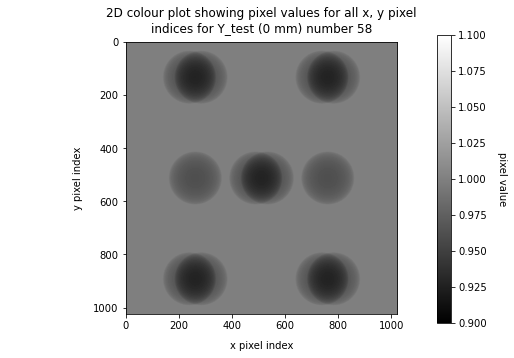

In [157]:
fig = plt.figure(figsize=(9, 5))

ax = fig.add_subplot(111)
ax.set_title("\n".join(wrap('2D colour plot showing pixel values for all x, y pixel indices for Y_test (0 mm) number ' 
          + str(rand_train), 60)), pad=10)
plt.imshow(np.squeeze(Y_test[rand_test]), cmap='gray', vmin=0.9, vmax=1.1)
plt.xlabel('x pixel index', labelpad=10)
plt.ylabel('y pixel index', labelpad=10)
ax.set_aspect('equal')

cax = fig.add_axes([0.12, 0.1, 0.78, 0.8])
cax.get_xaxis().set_visible(False)
cax.get_yaxis().set_visible(False)
cax.patch.set_alpha(0)
cax.set_frame_on(False)
cbar = plt.colorbar(orientation='vertical')
cbar.set_label('pixel value', rotation=270, labelpad=20)
plt.savefig('y_test.png', bbox_inches='tight')
plt.show()

In [136]:
# old figure
"""imshow(np.squeeze(Y_test[rand_test]), cmap='gray', vmin=0.9, vmax=1.1)
plt.title('2D colur map showing pixel values for all x, y pixel indices for Y_test (0 mm) number ' 
          + str(rand_test), pad=20)
plt.xlabel('x pixel index', labelpad=30)
plt.ylabel('y pixel index', labelpad=20)
plt.tight_layout()
plt.show"""

"imshow(np.squeeze(Y_test[rand_test]), cmap='gray', vmin=0.9, vmax=1.1)\nplt.title('2D colur map showing pixel values for all x, y pixel indices for Y_test (0 mm) number ' \n          + str(rand_test), pad=20)\nplt.xlabel('x pixel index', labelpad=30)\nplt.ylabel('y pixel index', labelpad=20)\nplt.tight_layout()\nplt.show"

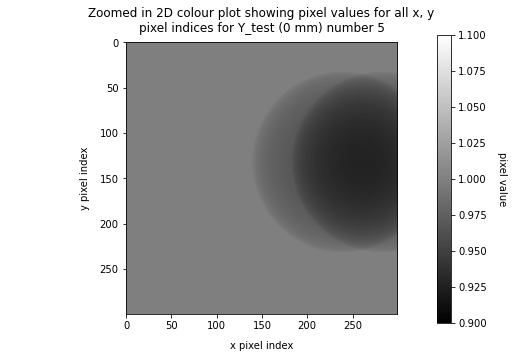

In [155]:
fig = plt.figure(figsize=(9, 5))

ax = fig.add_subplot(111)
ax.set_title("\n".join(wrap('Zoomed in 2D colour plot showing pixel values for all x, y pixel indices for Y_test (0 mm) number ' 
          + str(rand_test), 60)), pad=10)
plt.imshow(np.squeeze(Y_test[rand_test][0:300, 0:300]), cmap='gray', vmin=0.9, vmax=1.1)
plt.xlabel('x pixel index', labelpad=10)
plt.ylabel('y pixel index', labelpad=10)
ax.set_aspect('equal')

cax = fig.add_axes([0.12, 0.1, 0.78, 0.8])
cax.get_xaxis().set_visible(False)
cax.get_yaxis().set_visible(False)
cax.patch.set_alpha(0)
cax.set_frame_on(False)
cbar = plt.colorbar(orientation='vertical')
cbar.set_label('pixel value', rotation=270, labelpad=20)
plt.savefig('y_test_zoomed.png', bbox_inches='tight')
plt.show()

In [23]:
# Invert the stretch operation
X_predict_temp = np.divide(X_predict_stretch,10)
X_predict = np.add(X_predict_temp,0.9)

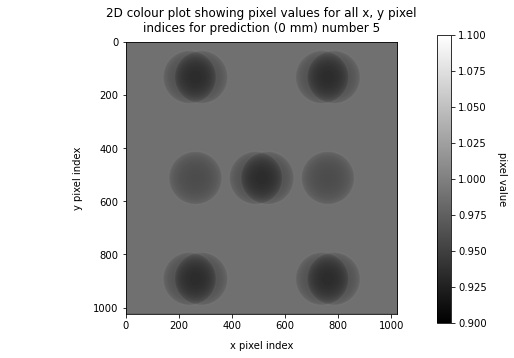

In [137]:
fig = plt.figure(figsize=(9, 5))

ax = fig.add_subplot(111)
ax.set_title("\n".join(wrap('2D colour plot showing pixel values for all x, y pixel indices for prediction (0 mm) number ' 
          + str(rand_test), 60)), pad=10)
plt.imshow(np.squeeze(X_predict[rand_test]), cmap='gray', vmin=0.9, vmax=1.1)
plt.xlabel('x pixel index', labelpad=10)
plt.ylabel('y pixel index', labelpad=10)
ax.set_aspect('equal')

cax = fig.add_axes([0.12, 0.1, 0.78, 0.8])
cax.get_xaxis().set_visible(False)
cax.get_yaxis().set_visible(False)
cax.patch.set_alpha(0)
cax.set_frame_on(False)
cbar = plt.colorbar(orientation='vertical')
cbar.set_label('pixel value', rotation=270, labelpad=20)
plt.savefig('prediction.png', bbox_inches='tight')
plt.show()

In [138]:
# old figure
"""imshow(np.squeeze(X_predict[rand_test]), cmap='gray', vmin=0.9, vmax=1.1)
plt.title('2D colour map showing pixel values for all x, y pixel indices for X_predict (0 mm) number ' 
          + str(rand_test), pad=20)
plt.xlabel('x pixel index', labelpad=30)
plt.ylabel('y pixel index', labelpad=20)
plt.tight_layout()
plt.show"""

"imshow(np.squeeze(X_predict[rand_test]), cmap='gray', vmin=0.9, vmax=1.1)\nplt.title('2D colour map showing pixel values for all x, y pixel indices for X_predict (0 mm) number ' \n          + str(rand_test), pad=20)\nplt.xlabel('x pixel index', labelpad=30)\nplt.ylabel('y pixel index', labelpad=20)\nplt.tight_layout()\nplt.show"

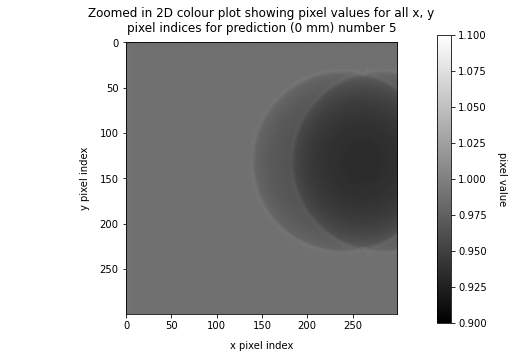

In [168]:
fig = plt.figure(figsize=(9, 5))

ax = fig.add_subplot(111)
ax.set_title("\n".join(wrap('Zoomed in 2D colour plot showing pixel values for all x, y pixel indices for prediction (0 mm) number ' 
          + str(rand_test), 60)), pad=10)
plt.imshow(np.squeeze(X_predict[rand_test][0:300, 0:300]), cmap='gray', vmin=0.9, vmax=1.1)
plt.xlabel('x pixel index', labelpad=10)
plt.ylabel('y pixel index', labelpad=10)
ax.set_aspect('equal')

cax = fig.add_axes([0.12, 0.1, 0.78, 0.8])
cax.get_xaxis().set_visible(False)
cax.get_yaxis().set_visible(False)
cax.patch.set_alpha(0)
cax.set_frame_on(False)
cbar = plt.colorbar(orientation='vertical')
cbar.set_label('pixel value', rotation=270, labelpad=20)
plt.savefig('prediction_zoomed.png', bbox_inches='tight')
plt.show()

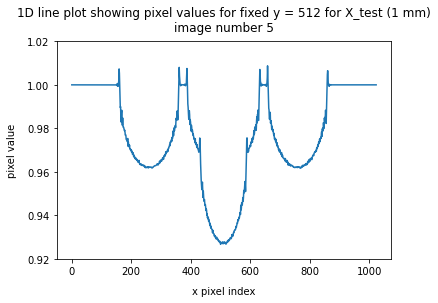

In [166]:
line = X_test[rand_test,512]
plt.plot(np.squeeze(line))
plt.title("\n".join(wrap('1D line plot showing pixel values for fixed y = 512 for X_test (1 mm) image number ' 
          + str(rand_test))), pad=10)
plt.xlabel('x pixel index', labelpad=10)
plt.ylabel('pixel value', labelpad=10)
plt.ylim([0.92, 1.02])
plt.savefig('x_test_512y.png', bbox_inches='tight')
plt.show()

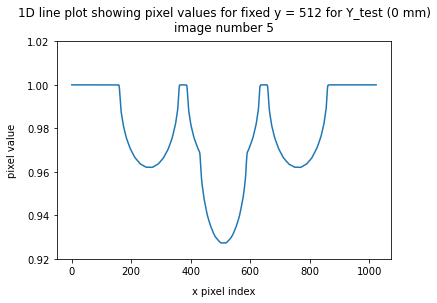

In [165]:
line = Y_test[rand_test,512]
plt.plot(np.squeeze(line))
plt.title("\n".join(wrap('1D line plot showing pixel values for fixed y = 512 for Y_test (0 mm) image number ' + str(rand_test))), pad=10)
plt.xlabel('x pixel index', labelpad=10)
plt.ylabel('pixel value', labelpad=10)
plt.ylim([0.92, 1.02])
plt.savefig('Y_test_512y.png', bbox_inches='tight')
plt.show()

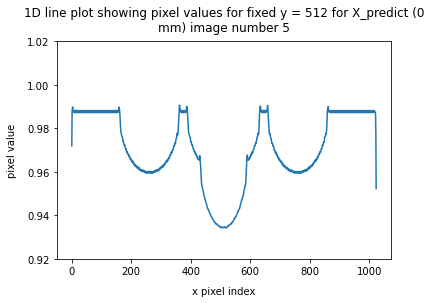

In [164]:
line = X_predict[rand_test,512]
plt.plot(np.squeeze(line))
plt.title("\n".join(wrap('1D line plot showing pixel values for fixed y = 512 for X_predict (0 mm) image number ' + str(rand_test))), pad=10)
plt.xlabel('x pixel index', labelpad=10)
plt.ylabel('pixel value', labelpad=10)
plt.ylim([0.92, 1.02])
plt.savefig('prediction_line_512y.png', bbox_inches='tight')
plt.show()